In [121]:
import numpy as np
import math as m

In [122]:
N=7

x=np.random.uniform(0,1,N)

print(f"{type(x)}\n")
print(f"массив x: {x}\n")
print(f"размерность: {x.shape}\n")
print(f"общее кол-во {x.size}\n")



<class 'numpy.ndarray'>

массив x: [0.00501018 0.99738424 0.28759682 0.22774655 0.32342134 0.65210079
 0.63924436]

размерность: (7,)

общее кол-во 7



In [123]:
def f(x):
  return x * m.sin(2 * m.pi * x)

def p(x):
  return  1+2*x+3*(x**2)+4*(x**3)

y=np.zeros(shape=(N), dtype='f')

for i in range(N):
  #eps=np.random.uniform(-0.01, 0.01)
  eps=np.random.normal(0,0.1)

  y[i]=f(x[i]) + eps
  #y[i]=p(x[i]) + eps

for i in range(N):
  print(f"({x[i]}, {y[i]})")

(0.005010176515229503, -0.028754761442542076)
(0.9973842382820347, 0.0018519400618970394)
(0.2875968161424838, 0.1426684558391571)
(0.2277465474053033, 0.3896011412143707)
(0.32342134286367163, 0.23845058679580688)
(0.6521007867080189, -0.6345235109329224)
(0.6392443558575162, -0.4808713495731354)


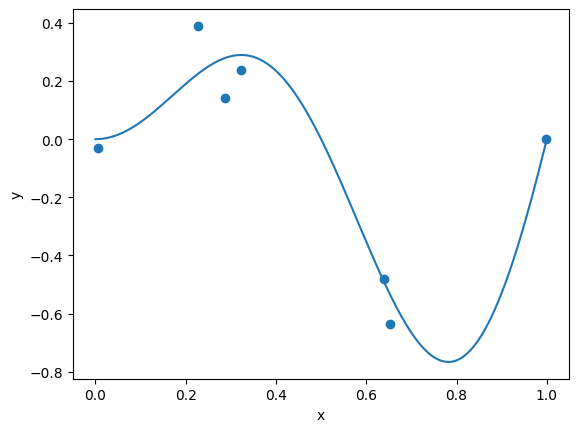

In [124]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
xx=np.arange(0, 1, 0.001)

yy=xx * np.sin(2 * np.pi * xx)
#yy=p(xx)

plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim(-1,1)
plt.show()

**ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ**

In [125]:
M = 10

A = np.zeros(shape=(M, M))
b = np.zeros(shape=(M))

In [126]:
def element(i,j):
  sum=0

  for k in range(0,N):
    sum=sum+x[k]**(i+j)

  return sum

In [127]:
def right_hand_side(i):
  sum=0

  for k in range(0,N):
    sum=sum+y[k]*(x[k]**i)

  return sum

In [128]:
for i in range(0,M):
  for j in range(0,M):
    A[i][j]=element(i,j)

for i in range(0,M):
  b[i]=right_hand_side(i)

In [129]:
print(A)

print(b)

[[7.         3.13250426 2.06785099 1.60011714 1.35785737 1.21776641
  1.13138496 1.07615782 1.04001871 1.01590289]
 [3.13250426 2.06785099 1.60011714 1.35785737 1.21776641 1.13138496
  1.07615782 1.04001871 1.01590289 0.99946296]
 [2.06785099 1.60011714 1.35785737 1.21776641 1.13138496 1.07615782
  1.04001871 1.01590289 0.99946296 0.98795565]
 [1.60011714 1.35785737 1.21776641 1.13138496 1.07615782 1.04001871
  1.01590289 0.99946296 0.98795565 0.97962865]
 [1.35785737 1.21776641 1.13138496 1.07615782 1.04001871 1.01590289
  0.99946296 0.98795565 0.97962865 0.97335607]
 [1.21776641 1.13138496 1.07615782 1.04001871 1.01590289 0.99946296
  0.98795565 0.97962865 0.97335607 0.96841246]
 [1.13138496 1.07615782 1.04001871 1.01590289 0.99946296 0.98795565
  0.97962865 0.97335607 0.96841246 0.96432971]
 [1.07615782 1.04001871 1.01590289 0.99946296 0.98795565 0.97962865
  0.97335607 0.96841246 0.96432971 0.96080555]
 [1.04001871 1.01590289 0.99946296 0.98795565 0.97962865 0.97335607
  0.96841246

In [130]:
import scipy
from scipy.linalg import solve

c = solve(A,b)
print(c)

[-6.14340847e-02  5.53849822e+00  2.08000890e+02 -2.35369389e+03
  8.42044059e+03 -1.11309563e+04  1.34627795e+03  5.82829734e+03
  3.31438460e+02 -2.65783377e+03]


<ipython-input-130-75de18fcb4c1>:4: LinAlgWarning: Ill-conditioned matrix (rcond=4.69806e-19): result may not be accurate.
  c = solve(A,b)


In [131]:
def CalcPolynomial(x):
  sum=0
  for i in range(0,M):
    sum=sum+c[i]*x**i

  return sum

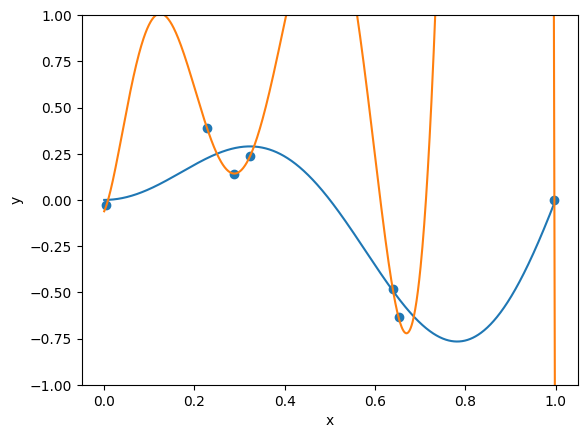

In [132]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
xx=np.arange(0, 1, 0.001)

yy=xx * np.sin(2 * np.pi * xx)
#yy=p(xx)

yyy=CalcPolynomial(xx)
plt.plot(xx, yy)
plt.plot(xx,yyy)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1,1)
plt.show()